# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore any warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Environment settings:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('drive/MyDrive/Colab Notebooks/CIC-Darknet.csv')
data.head()

Flow ID        Timestamp  Flow Duration  \
0     10.152.152.11-216.58.220.99-57158-443-6  24/7/2015 16:09            229   
1     10.152.152.11-216.58.220.99-57159-443-6  24/7/2015 16:09            407   
2     10.152.152.11-216.58.220.99-57160-443-6  24/7/2015 16:09            431   
3    10.152.152.11-74.125.136.120-49134-443-6  24/7/2015 16:09            359   
4  10.152.152.11-173.194.65.127-34697-19305-6  24/7/2015 16:09       10778451   

   Total Fwd Packet  Total Bwd packets  Total Length of Fwd Packet  \
0                 1                  1                           0   
1                 1                  1                           0   
2                 1                  1                           0   
3                 1                  1                           0   
4               591                400                       64530   

   Total Length of Bwd Packet  Fwd Packet Length Max  Fwd Packet Length Min  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                        6659                    131                      0   

   Fwd Packet Length Mean  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0.000000  ...                20            0           0   
1                0.000000  ...                20            0           0   
2                0.000000  ...                20            0           0   
3                0.000000  ...                20            0           0   
4              109.187817  ...                20            0           0   

   Active Max  Active Min     Idle Mean     Idle Std      Idle Max  \
0           0           0  0.000000e+00        0.000  0.000000e+00   
1           0           0  0.000000e+00        0.000  0.000000e+00   
2           0           0  0.000000e+00        0.000  0.000000e+00   
3           0           0  0.000000e+00        0.000  0.000000e+00   
4           0           0  1.437760e+15  3117718.131  1.437760e+15   

       Idle Min            Label  
0  0.000000e+00  AUDIO-STREAMING  
1  0.000000e+00  AUDIO-STREAMING  
2  0.000000e+00  AUDIO-STREAMING  
3  0.000000e+00  AUDIO-STREAMING  
4  1.437760e+15  AUDIO-STREAMING  

[5 rows x 79 columns]

# Data Preparation

## Data Cleaning

In [ ]:
# See information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 79 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Timestamp                   141530 non-null  object 
 2   Flow Duration               141530 non-null  int64  
 3   Total Fwd Packet            141530 non-null  int64  
 4   Total Bwd packets           141530 non-null  int64  
 5   Total Length of Fwd Packet  141530 non-null  int64  
 6   Total Length of Bwd Packet  141530 non-null  int64  
 7   Fwd Packet Length Max       141530 non-null  int64  
 8   Fwd Packet Length Min       141530 non-null  int64  
 9   Fwd Packet Length Mean      141530 non-null  float64
 10  Fwd Packet Length Std       141530 non-null  float64
 11  Bwd Packet Length Max       141530 non-null  int64  
 12  Bwd Packet Length Min       141530 non-null  int64  
 13  Bwd Packet Len

In [ ]:
# check shape of data
data.shape

(141530, 79)

In [ ]:
data.describe()

Flow Duration  Total Fwd Packet  Total Bwd packets  \
count   1.415300e+05     141530.000000      141530.000000   
mean    2.081280e+07        152.800749         154.642062   
std     3.809155e+07       2378.323352        3418.715287   
min     0.000000e+00          1.000000           0.000000   
25%     1.778100e+04          1.000000           0.000000   
50%     4.162820e+05          2.000000           1.000000   
75%     1.181470e+07          4.000000           3.000000   
max     1.200000e+08     238161.000000      470862.000000   

       Total Length of Fwd Packet  Total Length of Bwd Packet  \
count                1.415300e+05                1.415300e+05   
mean                 1.126211e+05                1.304530e+05   
std                  3.251357e+06                4.566180e+06   
min                  0.000000e+00                0.000000e+00   
25%                  0.000000e+00                0.000000e+00   
50%                  4.400000e+01                0.000000e+00   
75%                  2.160000e+02                2.160000e+02   
max                  7.693074e+08                6.704287e+08   

       Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
count          141530.000000          141530.000000           141530.000000   
mean              208.920420              15.617078               69.594959   
std               649.432333              31.312298              219.965954   
min                 0.000000               0.000000                0.000000   
25%                 0.000000               0.000000                0.000000   
50%                34.000000               0.000000               22.666667   
75%               103.000000              31.000000               45.000000   
max             64240.000000            1350.000000            28502.368970   

       Fwd Packet Length Std  Bwd Packet Length Max  ...  Fwd Act Data Pkts  \
count          141530.000000          141530.000000  ...      141530.000000   
mean               63.974203             229.971299  ...          96.881573   
std               168.646012             786.736861  ...        1582.814902   
min                 0.000000               0.000000  ...           0.000000   
25%                 0.000000               0.000000  ...           0.000000   
50%                 0.000000               0.000000  ...           1.000000   
75%                39.259818             213.000000  ...           2.000000   
max             15870.122980           48168.000000  ...      113325.000000   

       Fwd Seg Size Min  Active Mean  Active Std  Active Max  Active Min  \
count     141530.000000     141530.0    141530.0    141530.0    141530.0   
mean          15.808182          0.0         0.0         0.0         0.0   
std            7.110714          0.0         0.0         0.0         0.0   
min            0.000000          0.0         0.0         0.0         0.0   
25%            8.000000          0.0         0.0         0.0         0.0   
50%           20.000000          0.0         0.0         0.0         0.0   
75%           20.000000          0.0         0.0         0.0         0.0   
max           44.000000          0.0         0.0         0.0         0.0   

          Idle Mean      Idle Std      Idle Max      Idle Min  
count  1.415300e+05  1.415300e+05  1.415300e+05  1.415300e+05  
mean   7.028030e+14  5.526137e+13  7.305885e+14  5.994078e+14  
std    7.058710e+14  1.930165e+14  7.248202e+14  7.138287e+14  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
50%    7.281250e+14  0.000000e+00  1.427730e+15  5.584614e+06  
75%    1.456260e+15  1.031457e+07  1.456320e+15  1.456260e+15  
max    1.460000e+15  1.030000e+15  1.460000e+15  1.460000e+15  

[8 rows x 76 columns]

### Changing the optimal data types for features

In [ ]:
# Convert the 'Timestamp' column to datetime type
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Localize and convert the timestamps to the desired timezone
data['Timestamp'] = data['Timestamp'].dt.tz_localize('UTC').dt.tz_convert('Etc/GMT+12')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 79 columns):
 #   Column                      Non-Null Count   Dtype                     
---  ------                      --------------   -----                     
 0   Flow ID                     141530 non-null  object                    
 1   Timestamp                   141530 non-null  datetime64[ns, Etc/GMT+12]
 2   Flow Duration               141530 non-null  int64                     
 3   Total Fwd Packet            141530 non-null  int64                     
 4   Total Bwd packets           141530 non-null  int64                     
 5   Total Length of Fwd Packet  141530 non-null  int64                     
 6   Total Length of Bwd Packet  141530 non-null  int64                     
 7   Fwd Packet Length Max       141530 non-null  int64                     
 8   Fwd Packet Length Min       141530 non-null  int64                     
 9   Fwd Packet Length Mean      141530 no

### Remove the duplicates from the dataset
Duplicates in datasets can cause data leakage. It is important to locate and remove any meaningless duplicates.

In [ ]:
duplicate_count = data.duplicated().sum()
duplicate_count

24474

In [ ]:
df = data.drop_duplicates()
df.head()

Flow ID                 Timestamp  \
0     10.152.152.11-216.58.220.99-57158-443-6 2015-07-24 04:09:00-12:00   
1     10.152.152.11-216.58.220.99-57159-443-6 2015-07-24 04:09:00-12:00   
2     10.152.152.11-216.58.220.99-57160-443-6 2015-07-24 04:09:00-12:00   
3    10.152.152.11-74.125.136.120-49134-443-6 2015-07-24 04:09:00-12:00   
4  10.152.152.11-173.194.65.127-34697-19305-6 2015-07-24 04:09:00-12:00   

   Flow Duration  Total Fwd Packet  Total Bwd packets  \
0            229                 1                  1   
1            407                 1                  1   
2            431                 1                  1   
3            359                 1                  1   
4       10778451               591                400   

   Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                       64530                        6659   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  ...  \
0                      0                      0                0.000000  ...   
1                      0                      0                0.000000  ...   
2                      0                      0                0.000000  ...   
3                      0                      0                0.000000  ...   
4                    131                      0              109.187817  ...   

   Fwd Seg Size Min  Active Mean  Active Std  Active Max  Active Min  \
0                20            0           0           0           0   
1                20            0           0           0           0   
2                20            0           0           0           0   
3                20            0           0           0           0   
4                20            0           0           0           0   

      Idle Mean     Idle Std      Idle Max      Idle Min            Label  
0  0.000000e+00        0.000  0.000000e+00  0.000000e+00  AUDIO-STREAMING  
1  0.000000e+00        0.000  0.000000e+00  0.000000e+00  AUDIO-STREAMING  
2  0.000000e+00        0.000  0.000000e+00  0.000000e+00  AUDIO-STREAMING  
3  0.000000e+00        0.000  0.000000e+00  0.000000e+00  AUDIO-STREAMING  
4  1.437760e+15  3117718.131  1.437760e+15  1.437760e+15  AUDIO-STREAMING  

[5 rows x 79 columns]

### Check for infinity values in each column

In [ ]:
# Select only integer and float columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
print(np.isinf(numeric_columns).any())

Src Port                      False
Dst Port                      False
Protocol                      False
Flow Duration                 False
Total Fwd Packet              False
Total Bwd packets             False
Total Length of Fwd Packet    False
Total Length of Bwd Packet    False
Fwd Packet Length Max         False
Fwd Packet Length Min         False
Fwd Packet Length Mean        False
Fwd Packet Length Std         False
Bwd Packet Length Max         False
Bwd Packet Length Min         False
Bwd Packet Length Mean        False
Bwd Packet Length Std         False
Flow Bytes/s                   True
Flow Packets/s                 True
Flow IAT Mean                 False
Flow IAT Std                  False
Flow IAT Max                  False
Flow IAT Min                  False
Fwd IAT Total                 False
Fwd IAT Mean                  False
Fwd IAT Std                   False
Fwd IAT Max                   False
Fwd IAT Min                   False
Bwd IAT Total               

In [ ]:
# Drop unused column
drops = ['Flow Bytes/s','Flow Packets/s']
df1 = df.drop(columns=drops)
df1.shape

(117056, 77)

### Check missing values in each column

In [ ]:
missing_values = df1.isnull().sum().sort_values(ascending=False)
missing_values

Flow ID                       0
ECE Flag Count                0
Fwd Bulk Rate Avg             0
Fwd Packet/Bulk Avg           0
Fwd Bytes/Bulk Avg            0
Bwd Segment Size Avg          0
Fwd Segment Size Avg          0
Average Packet Size           0
Down/Up Ratio                 0
CWE Flag Count                0
Packet Length Mean            0
URG Flag Count                0
ACK Flag Count                0
PSH Flag Count                0
RST Flag Count                0
SYN Flag Count                0
FIN Flag Count                0
Packet Length Variance        0
Bwd Bytes/Bulk Avg            0
Bwd Packet/Bulk Avg           0
Bwd Bulk Rate Avg             0
Subflow Fwd Packets           0
Idle Min                      0
Idle Max                      0
Idle Std                      0
Idle Mean                     0
Active Min                    0
Active Max                    0
Active Std                    0
Active Mean                   0
Fwd Seg Size Min              0
Fwd Act 

### Rename columns

In [ ]:
df1.rename(columns = {"Label" : "Traffic Category"}, inplace = True)
df1.head()

Flow ID                 Timestamp  \
0     10.152.152.11-216.58.220.99-57158-443-6 2015-07-24 04:09:00-12:00   
1     10.152.152.11-216.58.220.99-57159-443-6 2015-07-24 04:09:00-12:00   
2     10.152.152.11-216.58.220.99-57160-443-6 2015-07-24 04:09:00-12:00   
3    10.152.152.11-74.125.136.120-49134-443-6 2015-07-24 04:09:00-12:00   
4  10.152.152.11-173.194.65.127-34697-19305-6 2015-07-24 04:09:00-12:00   

   Flow Duration  Total Fwd Packet  Total Bwd packets  \
0            229                 1                  1   
1            407                 1                  1   
2            431                 1                  1   
3            359                 1                  1   
4       10778451               591                400   

   Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                       64530                        6659   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  ...  \
0                      0                      0                0.000000  ...   
1                      0                      0                0.000000  ...   
2                      0                      0                0.000000  ...   
3                      0                      0                0.000000  ...   
4                    131                      0              109.187817  ...   

   Fwd Seg Size Min  Active Mean  Active Std  Active Max  Active Min  \
0                20            0           0           0           0   
1                20            0           0           0           0   
2                20            0           0           0           0   
3                20            0           0           0           0   
4                20            0           0           0           0   

      Idle Mean     Idle Std      Idle Max      Idle Min  Traffic Category  
0  0.000000e+00        0.000  0.000000e+00  0.000000e+00   AUDIO-STREAMING  
1  0.000000e+00        0.000  0.000000e+00  0.000000e+00   AUDIO-STREAMING  
2  0.000000e+00        0.000  0.000000e+00  0.000000e+00   AUDIO-STREAMING  
3  0.000000e+00        0.000  0.000000e+00  0.000000e+00   AUDIO-STREAMING  
4  1.437760e+15  3117718.131  1.437760e+15  1.437760e+15   AUDIO-STREAMING  

[5 rows x 77 columns]

### Labels correction
check unique value of Target variable (y)

In [ ]:
traffic_category_labels = df1["Traffic Category"].unique()
print(traffic_category_labels)

['AUDIO-STREAMING' 'Browsing' 'Chat' 'Email' 'File-Transfer'
 'File-transfer' 'P2P' 'Video-Streaming' 'Audio-Streaming'
 'Video-streaming' 'VOIP']


In [ ]:
df1["Traffic Category"].loc[df1["Traffic Category"] == 'AUDIO-STREAMING'] = 'Audio-Streaming'
df1["Traffic Category"].loc[df1["Traffic Category"] == 'File-transfer'] = 'File-Transfer'
df1["Traffic Category"].loc[df1["Traffic Category"] == 'Video-streaming'] = 'Video-Streaming'
df1["Traffic Category"].loc[df1["Traffic Category"] == 'VOIP'] = 'VoIP'


traffic_category_labels = df1["Traffic Category"].unique()
print(traffic_category_labels)

['Audio-Streaming' 'Browsing' 'Chat' 'Email' 'File-Transfer' 'P2P'
 'Video-Streaming' 'VoIP']


### Create new features

#### 'Timestamp' feature extraction

This is Timestamp format ' YYYY-MM-DD hh:mm:ss ' such as ' 2015-07-24 16:09:48 '
- Select only hour(hh) because I want to know Access hour on Darknets

In [ ]:
df1['Hour'] = df1['Timestamp'].apply(lambda x: int(str(x).split()[1].split(':')[0]))

print(df1[['Timestamp', 'Hour']].head())

                  Timestamp  Hour
0 2015-07-24 04:09:00-12:00     4
1 2015-07-24 04:09:00-12:00     4
2 2015-07-24 04:09:00-12:00     4
3 2015-07-24 04:09:00-12:00     4
4 2015-07-24 04:09:00-12:00     4


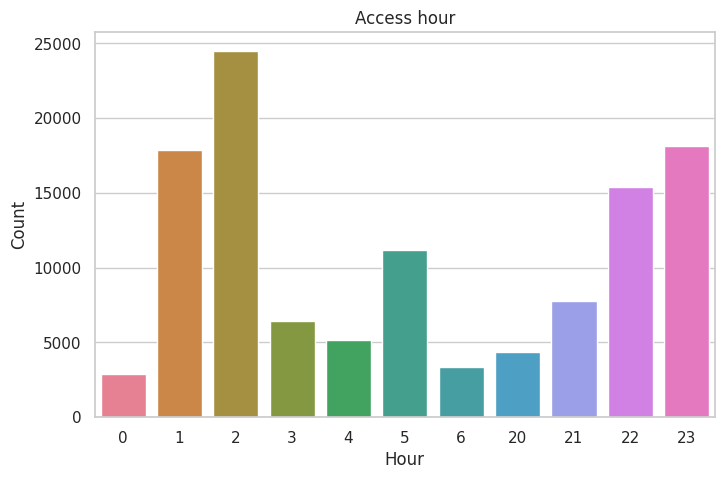

In [ ]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(x='Hour', palette="husl", data=df1)

plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Access hour")
plt.show()

#### 'Flow ID' feature extraction

Split a column into multiple columns by using the str.split() method in Pandas.

*   New features after split 'Flow ID' are 'Src IP', 'Dst IP', 'Src Port', 'Dst Port' and 'Protocol'

In [ ]:
# split columns
df1[['Src IP', 'Dst IP', 'Src Port', 'Dst Port', 'Protocol']] = df1['Flow ID'].str.split('-', expand=True)
df1.head()

Flow ID                 Timestamp  \
0     10.152.152.11-216.58.220.99-57158-443-6 2015-07-24 04:09:00-12:00   
1     10.152.152.11-216.58.220.99-57159-443-6 2015-07-24 04:09:00-12:00   
2     10.152.152.11-216.58.220.99-57160-443-6 2015-07-24 04:09:00-12:00   
3    10.152.152.11-74.125.136.120-49134-443-6 2015-07-24 04:09:00-12:00   
4  10.152.152.11-173.194.65.127-34697-19305-6 2015-07-24 04:09:00-12:00   

   Flow Duration  Total Fwd Packet  Total Bwd packets  \
0            229                 1                  1   
1            407                 1                  1   
2            431                 1                  1   
3            359                 1                  1   
4       10778451               591                400   

   Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                       64530                        6659   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  ...  \
0                      0                      0                0.000000  ...   
1                      0                      0                0.000000  ...   
2                      0                      0                0.000000  ...   
3                      0                      0                0.000000  ...   
4                    131                      0              109.187817  ...   

      Idle Std      Idle Max      Idle Min  Traffic Category  Hour  \
0        0.000  0.000000e+00  0.000000e+00   Audio-Streaming     4   
1        0.000  0.000000e+00  0.000000e+00   Audio-Streaming     4   
2        0.000  0.000000e+00  0.000000e+00   Audio-Streaming     4   
3        0.000  0.000000e+00  0.000000e+00   Audio-Streaming     4   
4  3117718.131  1.437760e+15  1.437760e+15   Audio-Streaming     4   

          Src IP          Dst IP  Src Port  Dst Port  Protocol  
0  10.152.152.11   216.58.220.99     57158       443         6  
1  10.152.152.11   216.58.220.99     57159       443         6  
2  10.152.152.11   216.58.220.99     57160       443         6  
3  10.152.152.11  74.125.136.120     49134       443         6  
4  10.152.152.11  173.194.65.127     34697     19305         6  

[5 rows x 83 columns]

In [ ]:
# Drop unused column
drops = ['Timestamp', 'Flow ID']
df2 = df1.drop(columns=drops)
df2.head()

Flow Duration  Total Fwd Packet  Total Bwd packets  \
0            229                 1                  1   
1            407                 1                  1   
2            431                 1                  1   
3            359                 1                  1   
4       10778451               591                400   

   Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                       64530                        6659   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      0                      0                0.000000   
1                      0                      0                0.000000   
2                      0                      0                0.000000   
3                      0                      0                0.000000   
4                    131                      0              109.187817   

   Fwd Packet Length Std  Bwd Packet Length Max  ...     Idle Std  \
0               0.000000                      0  ...        0.000   
1               0.000000                      0  ...        0.000   
2               0.000000                      0  ...        0.000   
3               0.000000                      0  ...        0.000   
4              22.283313                    498  ...  3117718.131   

       Idle Max      Idle Min  Traffic Category  Hour         Src IP  \
0  0.000000e+00  0.000000e+00   Audio-Streaming     4  10.152.152.11   
1  0.000000e+00  0.000000e+00   Audio-Streaming     4  10.152.152.11   
2  0.000000e+00  0.000000e+00   Audio-Streaming     4  10.152.152.11   
3  0.000000e+00  0.000000e+00   Audio-Streaming     4  10.152.152.11   
4  1.437760e+15  1.437760e+15   Audio-Streaming     4  10.152.152.11   

           Dst IP  Src Port  Dst Port  Protocol  
0   216.58.220.99     57158       443         6  
1   216.58.220.99     57159       443         6  
2   216.58.220.99     57160       443         6  
3  74.125.136.120     49134       443         6  
4  173.194.65.127     34697     19305         6  

[5 rows x 81 columns]

## Exploratory Data Analysis (EDA)

### General

In [ ]:
# See information of data after cleaning
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117056 entries, 0 to 141529
Data columns (total 81 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow Duration               117056 non-null  int64  
 1   Total Fwd Packet            117056 non-null  int64  
 2   Total Bwd packets           117056 non-null  int64  
 3   Total Length of Fwd Packet  117056 non-null  int64  
 4   Total Length of Bwd Packet  117056 non-null  int64  
 5   Fwd Packet Length Max       117056 non-null  int64  
 6   Fwd Packet Length Min       117056 non-null  int64  
 7   Fwd Packet Length Mean      117056 non-null  float64
 8   Fwd Packet Length Std       117056 non-null  float64
 9   Bwd Packet Length Max       117056 non-null  int64  
 10  Bwd Packet Length Min       117056 non-null  int64  
 11  Bwd Packet Length Mean      117056 non-null  float64
 12  Bwd Packet Length Std       117056 non-null  float64
 13  Flow IAT Mean 

In [ ]:
# check shape of data
df2.shape

(117056, 81)

In [ ]:
df2.describe()

Flow Duration  Total Fwd Packet  Total Bwd packets  \
count   1.170560e+05     117056.000000      117056.000000   
mean    1.999155e+07        161.712992         163.723508   
std     3.781548e+07       2530.910936        3714.022418   
min     0.000000e+00          1.000000           0.000000   
25%     9.150000e+02          1.000000           0.000000   
50%     4.111780e+05          2.000000           1.000000   
75%     9.896463e+06          4.000000           3.000000   
max     1.200000e+08     238161.000000      470862.000000   

       Total Length of Fwd Packet  Total Length of Bwd Packet  \
count                1.170560e+05                1.170560e+05   
mean                 1.175879e+05                1.380436e+05   
std                  3.501611e+06                4.980255e+06   
min                  0.000000e+00                0.000000e+00   
25%                  0.000000e+00                0.000000e+00   
50%                  4.400000e+01                2.000000e+01   
75%                  1.960000e+02                2.340000e+02   
max                  7.693074e+08                6.704287e+08   

       Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
count          117056.000000          117056.000000           117056.000000   
mean              204.582508              17.425916               70.629274   
std               687.461856              31.327943              233.091924   
min                 0.000000               0.000000                0.000000   
25%                 0.000000               0.000000                0.000000   
50%                34.000000               0.000000               30.000000   
75%                88.000000              33.000000               44.000000   
max             64240.000000            1350.000000            28502.368970   

       Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  \
count          117056.000000          117056.000000          117056.000000   
mean               60.214119             251.342178              49.803205   
std               171.358768             847.763708             108.852184   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000              20.000000               0.000000   
75%                39.259818             216.000000              36.000000   
max             15870.122980           48168.000000            1350.000000   

       Bwd Packet Length Mean  Bwd Packet Length Std  Flow IAT Mean  \
count           117056.000000          117056.000000   1.170560e+05   
mean               120.465781              69.949791   2.334567e+06   
std                249.321232             205.382895   6.683584e+06   
min                  0.000000               0.000000   0.000000e+00   
25%                  0.000000               0.000000   8.450000e+02   
50%                  4.000000               0.000000   1.678480e+05   
75%                153.000000              11.313709   1.334733e+06   
max               9901.912706           11469.193480   1.199856e+08   

       Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Total  Fwd IAT Mean  \
count  1.170560e+05  1.170560e+05  1.170560e+05   1.170560e+05  1.170560e+05   
mean   2.897271e+06  8.873794e+06  7.886088e+05   1.915800e+07  3.770805e+06   
std    7.318545e+06  1.847466e+07  5.218482e+06   3.745474e+07  1.092206e+07   
min    0.000000e+00  0.000000e+00 -2.255000e+03   0.000000e+00  0.000000e+00   
25%    0.000000e+00  8.867500e+02  1.700000e+01   0.000000e+00  0.000000e+00   
50%    2.404163e+01  4.101190e+05  2.050000e+02   8.071800e+04  2.170750e+04   
75%    2.038265e+06  6.332267e+06  1.275692e+05   9.562027e+06  1.714535e+06   
max    8.477462e+07  1.199994e+08  1.199856e+08   1.200000e+08  1.199997e+08   

        Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total  Bwd IAT Mean  \
count  1.170560

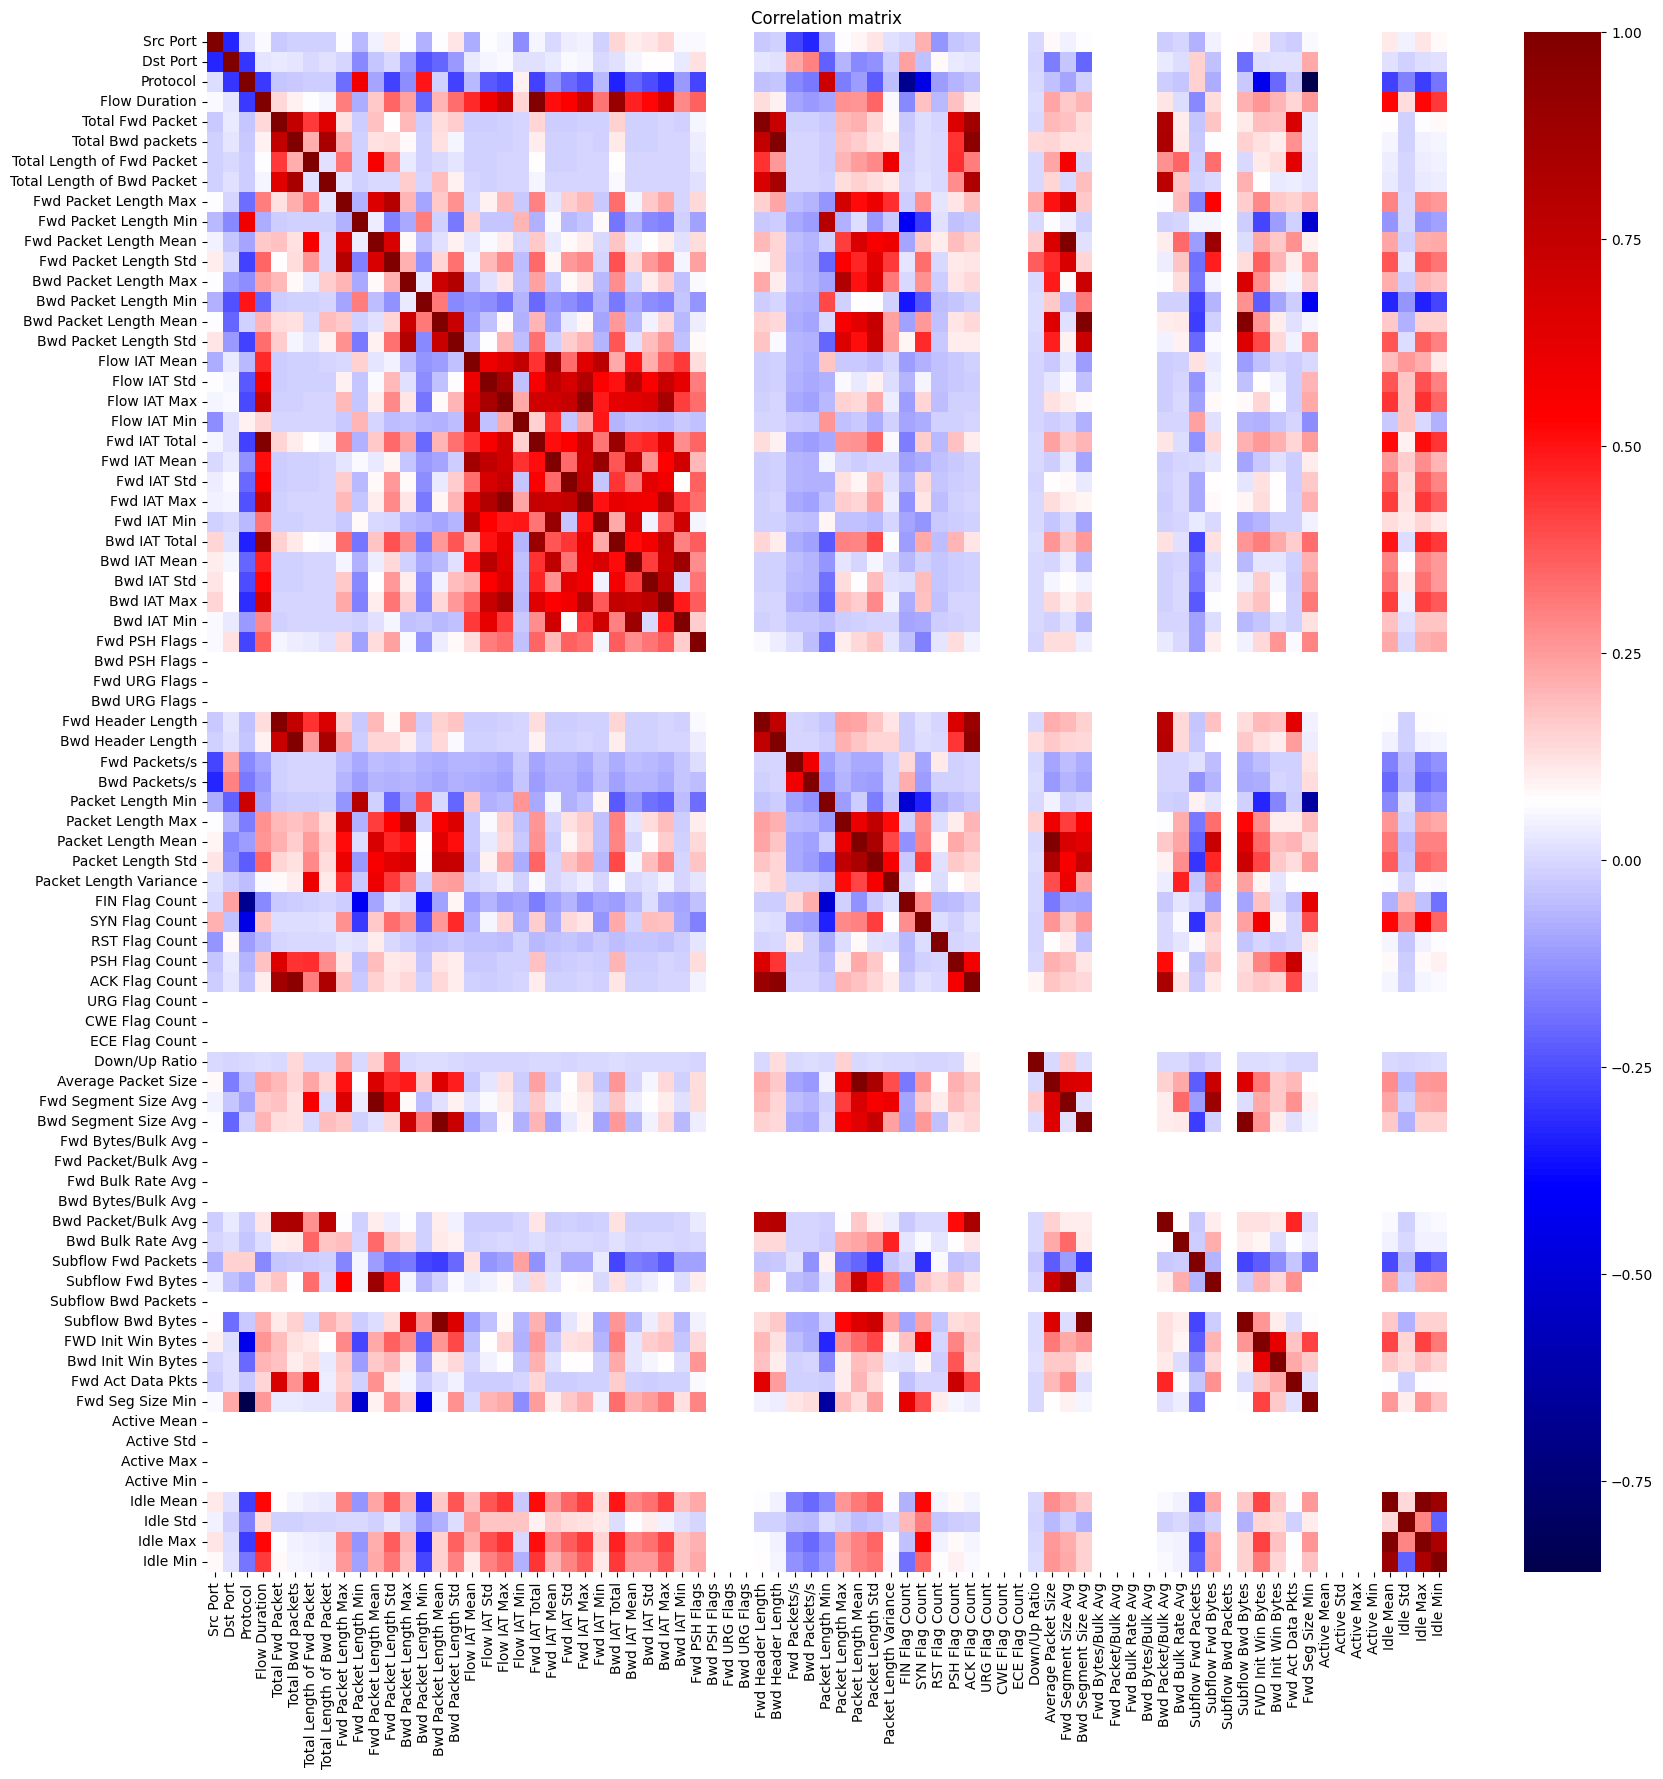

In [ ]:
# Plot correlation matrix
corr = df2.corr()

plt.figure(figsize = (20, 20))
plt.title('Correlation matrix')
sns.heatmap(corr, xticklabels = True, yticklabels = True, cmap = 'seismic') #Show all labels
plt.show()

In [ ]:
corr_df = abs(corr).unstack().reset_index()
corr_df.columns = ['Feature1', 'Feature2', 'Correlation']
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df = corr_df[(corr_df['Feature1'] != corr_df['Feature2']) & (corr_df['Correlation']>0.7)]
corr_df

Feature1                Feature2  Correlation
1132  Bwd Packet Length Mean    Bwd Segment Size Avg     1.000000
823   Fwd Packet Length Mean    Fwd Segment Size Avg     1.000000
4172    Bwd Segment Size Avg  Bwd Packet Length Mean     1.000000
4091    Fwd Segment Size Avg  Fwd Packet Length Mean     1.000000
4044     Average Packet Size      Packet Length Mean     0.993299
...                      ...                     ...          ...
1558           Fwd IAT Total            Flow IAT Max     0.712168
1635            Fwd IAT Mean            Flow IAT Max     0.707229
1407            Flow IAT Max            Fwd IAT Mean     0.707229
1646            Fwd IAT Mean             Bwd IAT Min     0.704683
2254             Bwd IAT Min            Fwd IAT Mean     0.704683

[158 rows x 3 columns]

In [ ]:
all_columns = list(df2.columns)

for col in all_columns[1:]:
    print(f"{col} :", len(df2[col].unique()))

Total Fwd Packet : 2121
Total Bwd packets : 2140
Total Length of Fwd Packet : 8034
Total Length of Bwd Packet : 10615
Fwd Packet Length Max : 1456
Fwd Packet Length Min : 251
Fwd Packet Length Mean : 16068
Fwd Packet Length Std : 21246
Bwd Packet Length Max : 1477
Bwd Packet Length Min : 396
Bwd Packet Length Mean : 15272
Bwd Packet Length Std : 18540
Flow IAT Mean : 82686
Flow IAT Std : 58063
Flow IAT Max : 79396
Flow IAT Min : 34375
Fwd IAT Total : 61186
Fwd IAT Mean : 61531
Fwd IAT Std : 45630
Fwd IAT Max : 58428
Fwd IAT Min : 27164
Bwd IAT Total : 39204
Bwd IAT Mean : 39217
Bwd IAT Std : 32414
Bwd IAT Max : 37218
Bwd IAT Min : 15446
Fwd PSH Flags : 2
Bwd PSH Flags : 1
Fwd URG Flags : 1
Bwd URG Flags : 1
Fwd Header Length : 2966
Bwd Header Length : 2965
Fwd Packets/s : 82699
Bwd Packets/s : 60891
Packet Length Min : 139
Packet Length Max : 1554
Packet Length Mean : 20388
Packet Length Std : 24134
Packet Length Variance : 24134
FIN Flag Count : 3
SYN Flag Count : 6
RST Flag Count : 1

### Protocol

Protocol Number
- 0 : HOPOPT (IPv6 Hop-by-Hop Option)
- 6 : TCP (Transmission Control Protocol)
- 17 : UDP (User Datagram Protocol)

In [ ]:
df2['Protocol'].unique()

array(['6', '17', '0'], dtype=object)

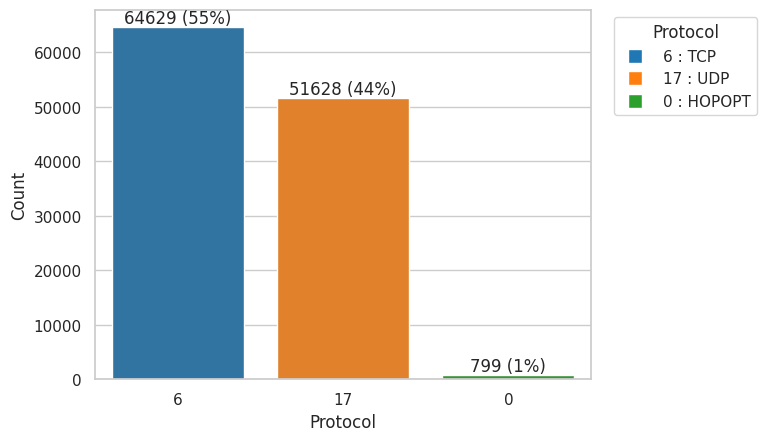

In [ ]:
ax = sns.countplot(x=df2['Protocol'], palette="tab10", order=df2['Protocol'].value_counts(ascending=False).index)

abs_values = df2['Protocol'].value_counts(ascending=False)
rel_values = df2['Protocol'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

# Create custom legend
legend_labels = ['6 : TCP', '17 : UDP', '0 : HOPOPT']
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels, sns.color_palette("tab10"))]
legend = plt.legend(handles=legend_handles, title='Protocol', loc="upper right", bbox_to_anchor=(1.35, 1))

# Show the legend
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.show()

### Traffic Category

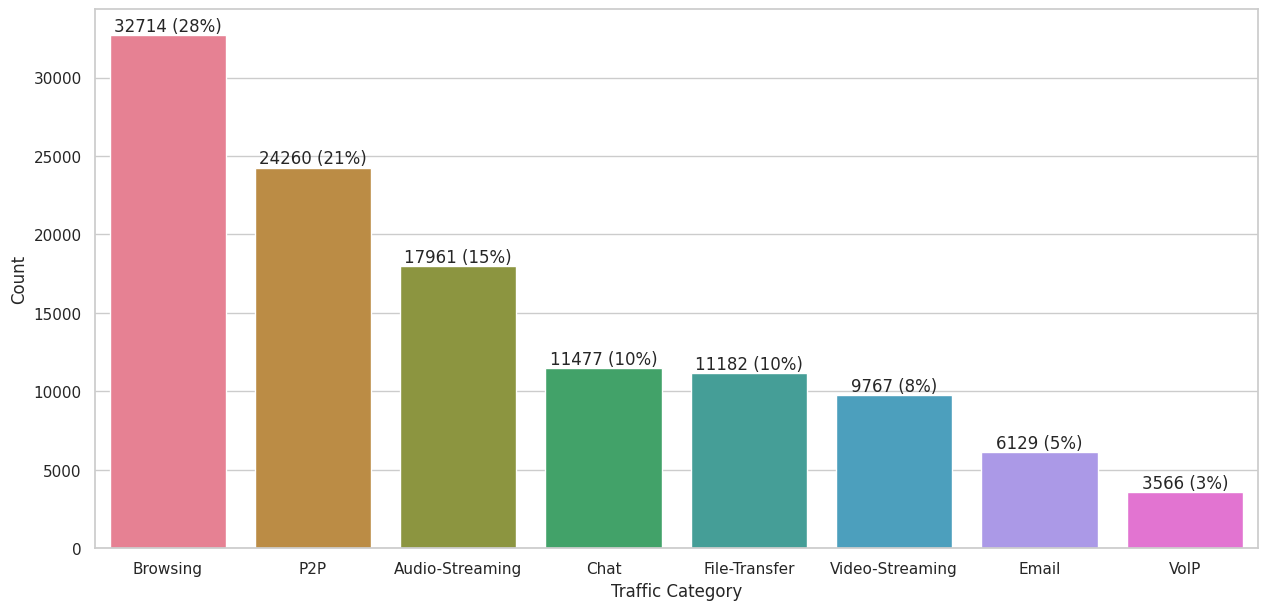

In [ ]:
plt.figure(figsize=(15, 7))

ax = sns.countplot(x=df2['Traffic Category'], palette="husl", order=df2['Traffic Category'].value_counts(ascending=False).index)

abs_values = df2['Traffic Category'].value_counts(ascending=False)
rel_values = df2['Traffic Category'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

# Show the legend
plt.xlabel("Traffic Category")
plt.ylabel("Count")
plt.show()

### Plot the distribution

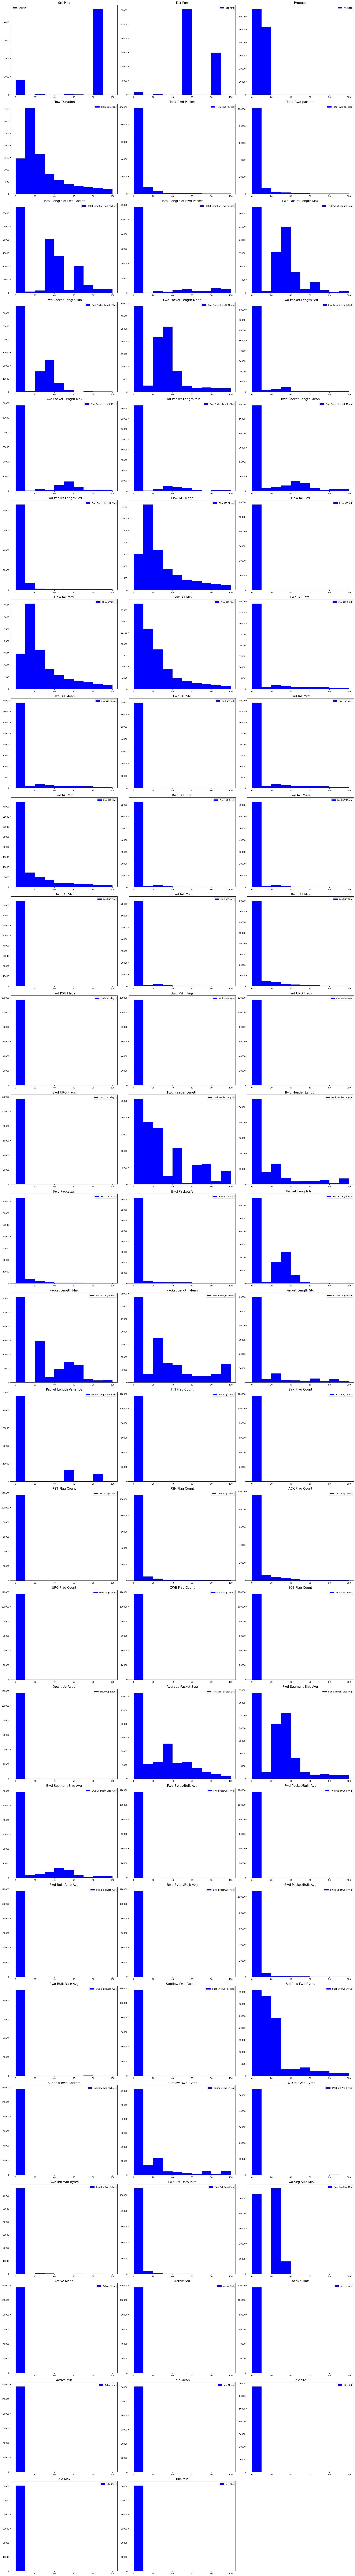

In [ ]:
# Select only columns with float64 and int64 data types
numeric_cols = df2.select_dtypes(include=['float64', 'int64'])

# Set the figure size
plt.figure(figsize=(24, 200))

try:
    for i, col in enumerate(numeric_cols.columns):
        plt.subplot(30, 3, i + 1)

        # Specify a finite range for the histogram (adjust as needed)
        finite_range = (0, 100)  # Example range

        plt.hist(numeric_cols[col], label=col, color='blue', range=finite_range)
        plt.legend()
        plt.title(col, fontsize=15)
        plt.tight_layout()
except Exception as e:
    print(col, e)

plt.show()

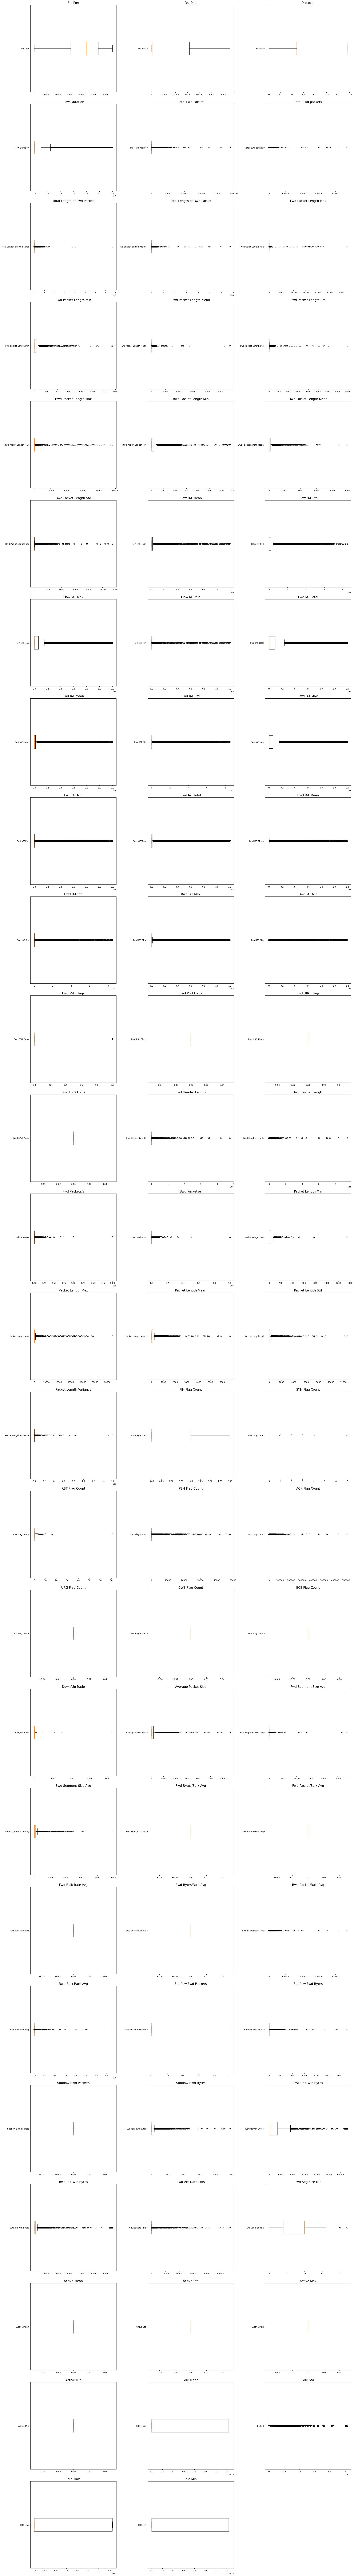

In [ ]:
# Select only columns with float64 and int64 data types
numeric_cols = df2.select_dtypes(include=['float64', 'int64'])

# Set the figure size
plt.figure(figsize=(24, 200))

try:
    for i, col in enumerate(numeric_cols.columns):
        plt.subplot(30, 3, i + 1)

        plt.boxplot(numeric_cols[col], labels=[col], vert=False)
        plt.title(col, fontsize=15)
        plt.tight_layout()

except Exception as e:
    print(col, e)

plt.show()

## Feature Encoding

### Label Encoding

Traffic Category
- 0 : 'Audio-Streaming'
- 1 : 'Browsing'
- 2 : 'Chat'
- 3 : 'Email'
- 4 : 'File-Transfer'
- 5 : 'P2P'
- 6 : 'Video-Streaming'
- 7 : 'VoIP'

In [ ]:
df2['Traffic Category'].unique()

array(['Audio-Streaming', 'Browsing', 'Chat', 'Email', 'File-Transfer',
       'P2P', 'Video-Streaming', 'VoIP'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Define the mapping dictionary
traffic_mapping = {
    'Audio-Streaming': 0,
    'Browsing': 1,
    'Chat': 2,
    'Email': 3,
    'File-Transfer': 4,
    'P2P': 5,
    'Video-Streaming': 6,
    'VoIP': 7
}

# Fit and transform
df2['Traffic Category'] = label_encoder.fit_transform(df2['Traffic Category'].map(traffic_mapping))
df2['Src IP'] = label_encoder.fit_transform(df2['Src IP'])
df2['Dst IP'] = label_encoder.fit_transform(df2['Dst IP'])

df2.head()

Flow Duration  Total Fwd Packet  Total Bwd packets  \
0            229                 1                  1   
1            407                 1                  1   
2            431                 1                  1   
3            359                 1                  1   
4       10778451               591                400   

   Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                       64530                        6659   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      0                      0                0.000000   
1                      0                      0                0.000000   
2                      0                      0                0.000000   
3                      0                      0                0.000000   
4                    131                      0              109.187817   

   Fwd Packet Length Std  Bwd Packet Length Max  ...     Idle Std  \
0               0.000000                      0  ...        0.000   
1               0.000000                      0  ...        0.000   
2               0.000000                      0  ...        0.000   
3               0.000000                      0  ...        0.000   
4              22.283313                    498  ...  3117718.131   

       Idle Max      Idle Min  Traffic Category  Hour  Src IP  Dst IP  \
0  0.000000e+00  0.000000e+00                 0     4      13    3431   
1  0.000000e+00  0.000000e+00                 0     4      13    3431   
2  0.000000e+00  0.000000e+00                 0     4      13    3431   
3  0.000000e+00  0.000000e+00                 0     4      13    5811   
4  1.437760e+15  1.437760e+15                 0     4      13    1661   

   Src Port  Dst Port  Protocol  
0     57158       443         6  
1     57159       443         6  
2     57160       443         6  
3     49134       443         6  
4     34697     19305         6  

[5 rows x 81 columns]

In [ ]:
df2['Traffic Category'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

## Separate the features (X) and target (y)

In [ ]:
X = df2.drop(columns=['Traffic Category'])
y = df2['Traffic Category']

## Feature Scaling

In [ ]:
X.describe()

Flow Duration  Total Fwd Packet  Total Bwd packets  \
count   1.170560e+05     117056.000000      117056.000000   
mean    1.999155e+07        161.712992         163.723508   
std     3.781548e+07       2530.910936        3714.022418   
min     0.000000e+00          1.000000           0.000000   
25%     9.150000e+02          1.000000           0.000000   
50%     4.111780e+05          2.000000           1.000000   
75%     9.896463e+06          4.000000           3.000000   
max     1.200000e+08     238161.000000      470862.000000   

       Total Length of Fwd Packet  Total Length of Bwd Packet  \
count                1.170560e+05                1.170560e+05   
mean                 1.175879e+05                1.380436e+05   
std                  3.501611e+06                4.980255e+06   
min                  0.000000e+00                0.000000e+00   
25%                  0.000000e+00                0.000000e+00   
50%                  4.400000e+01                2.000000e+01   
75%                  1.960000e+02                2.340000e+02   
max                  7.693074e+08                6.704287e+08   

       Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
count          117056.000000          117056.000000           117056.000000   
mean              204.582508              17.425916               70.629274   
std               687.461856              31.327943              233.091924   
min                 0.000000               0.000000                0.000000   
25%                 0.000000               0.000000                0.000000   
50%                34.000000               0.000000               30.000000   
75%                88.000000              33.000000               44.000000   
max             64240.000000            1350.000000            28502.368970   

       Fwd Packet Length Std  Bwd Packet Length Max  ...  Active Std  \
count          117056.000000          117056.000000  ...    117056.0   
mean               60.214119             251.342178  ...         0.0   
std               171.358768             847.763708  ...         0.0   
min                 0.000000               0.000000  ...         0.0   
25%                 0.000000               0.000000  ...         0.0   
50%                 0.000000              20.000000  ...         0.0   
75%                39.259818             216.000000  ...         0.0   
max             15870.122980           48168.000000  ...         0.0   

       Active Max  Active Min     Idle Mean      Idle Std      Idle Max  \
count    117056.0    117056.0  1.170560e+05  1.170560e+05  1.170560e+05   
mean          0.0         0.0  6.571391e+14  5.305993e+13  6.847218e+14   
std           0.0         0.0  7.028645e+14  1.927833e+14  7.228148e+14   
min           0.0         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
25%           0.0         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
50%           0.0         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
75%           0.0         0.0  1.438020e+15  5.028071e+06  1.456250e+15   
max           0.0         0.0  1.460000e+15  1.030000e+15  1.460000e+15   

           Idle Min           Hour         Src IP         Dst IP  
count  1.170560e+05  117056.000000  117056.000000  117056.000000  
mean   5.606397e+14      10.154046     318.027696    2447.759773  
std    7.051268e+14       9.601400     729.186626    2162.550536  
min    0.000000e+00       0.000000       0.000000       0.000000  
25%    0.000000e+00       2.000000      13.000000     797.000000  
50%    0.000000e+00       5.000000      13.000000    2169.000000  
75%    1.438010e+15      22.000000     414.000000    3702.000000  
max    1.460000e+15      23.000000    3913.000000    7196.000000  

[8 rows x 77 columns]

#### Normalization with Min-Max Scaling

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

Min-Max Scaling
- Min-Max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

- All features does not show a normal distribution, it is better to Min-Max Scaling to ensure all results are between 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler() # creating an instance of the class object
X_normalized = pd.DataFrame(mm.fit_transform(X), columns=X.columns)  #fit and transforming MinMaxScaler the dataframe
X_normalized.head()

Flow Duration  Total Fwd Packet  Total Bwd packets  \
0       0.000002          0.000000           0.000002   
1       0.000003          0.000000           0.000002   
2       0.000004          0.000000           0.000002   
3       0.000003          0.000000           0.000002   
4       0.089820          0.002477           0.000850   

   Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                    0.000000                     0.00000   
1                    0.000000                     0.00000   
2                    0.000000                     0.00000   
3                    0.000000                     0.00000   
4                    0.000084                     0.00001   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0               0.000000                    0.0                0.000000   
1               0.000000                    0.0                0.000000   
2               0.000000                    0.0                0.000000   
3               0.000000                    0.0                0.000000   
4               0.002039                    0.0                0.003831   

   Fwd Packet Length Std  Bwd Packet Length Max  ...  Idle Mean      Idle Std  \
0               0.000000               0.000000  ...   0.000000  0.000000e+00   
1               0.000000               0.000000  ...   0.000000  0.000000e+00   
2               0.000000               0.000000  ...   0.000000  0.000000e+00   
3               0.000000               0.000000  ...   0.000000  0.000000e+00   
4               0.001404               0.010339  ...   0.984767  3.026911e-09   

   Idle Max  Idle Min      Hour    Src IP    Dst IP  Src Port  Dst Port  \
0  0.000000  0.000000  0.173913  0.003322  0.476793  0.872188  0.006760   
1  0.000000  0.000000  0.173913  0.003322  0.476793  0.872204  0.006760   
2  0.000000  0.000000  0.173913  0.003322  0.476793  0.872219  0.006760   
3  0.000000  0.000000  0.173913  0.003322  0.807532  0.749748  0.006760   
4  0.984767  0.984767  0.173913  0.003322  0.230823  0.529450  0.294575   

   Protocol  
0  0.352941  
1  0.352941  
2  0.352941  
3  0.352941  
4  0.352941  

[5 rows x 80 columns]

## Check dataset is balanced or not?

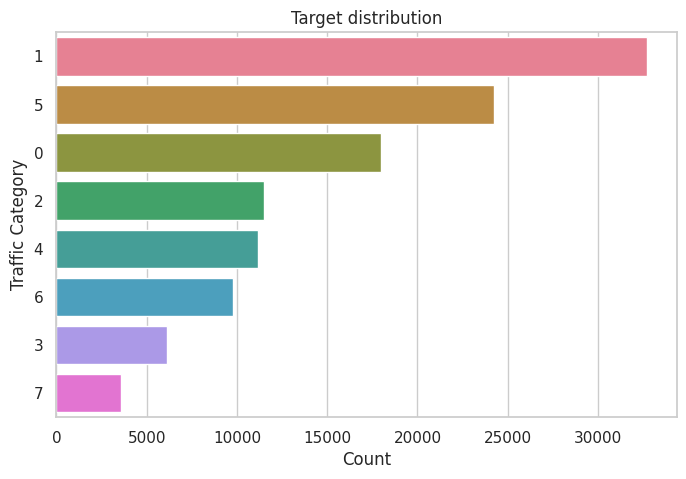

In [ ]:
# Calculate the frequency of each category and sort them in descending order
category_counts = df2['Traffic Category'].value_counts().reset_index().sort_values(by='Traffic Category', ascending=False)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(y='Traffic Category', palette="husl", data=df2, order=category_counts['index'])
plt.xlabel("Count")
plt.ylabel("Traffic Category")
plt.title("Target distribution")
plt.show()

### SMOTE
> SMOTE is an oversampling technique that generates synthetic samples from the minority class.


> SMOTE works by selecting pair of minority class observations and then creating a synthetic point that lies on the line connecting these two. It is pretty liberal about selecting the minority points and may end up picking up minority points that are outliers.






Convert imbalanced dataset into balanced dataset using SMOTE

In [ ]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_normalized, y)

print(X_res.shape)
print(y_res.shape)

(261712, 80)
(261712,)


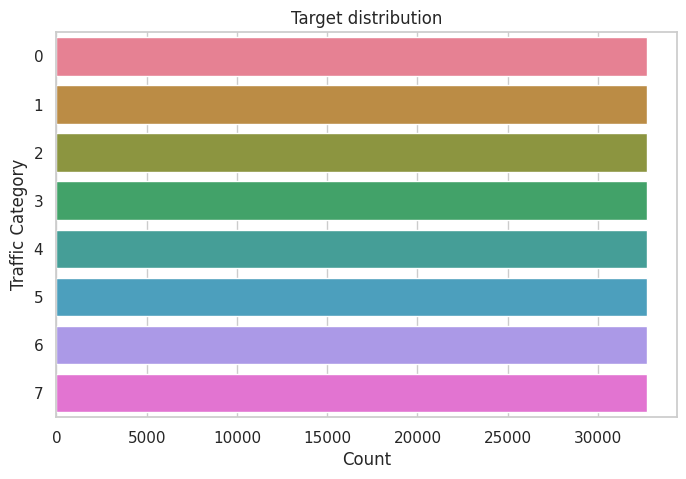

In [ ]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(y=y_res, palette="husl")
plt.xlabel("Count")
plt.ylabel("Traffic Category")
plt.title("Target distribution")
plt.show()

## Feture Selection

removing unnecessary features

#### Mutual Information

In [ ]:
# check the correlation of data
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X_res, y_res)
feat_importances = pd.Series(importances, df2.columns[df2.columns != 'Traffic Category'])

feat_importances.sort_values(ascending=False)

Dst IP                1.215131
Src IP                1.139322
Dst Port              0.879993
Flow IAT Max          0.841108
Packet Length Mean    0.836573
                        ...   
Active Mean           0.000000
CWE Flag Count        0.000000
Bwd URG Flags         0.000000
Bwd PSH Flags         0.000000
Fwd Bytes/Bulk Avg    0.000000
Length: 80, dtype: float64

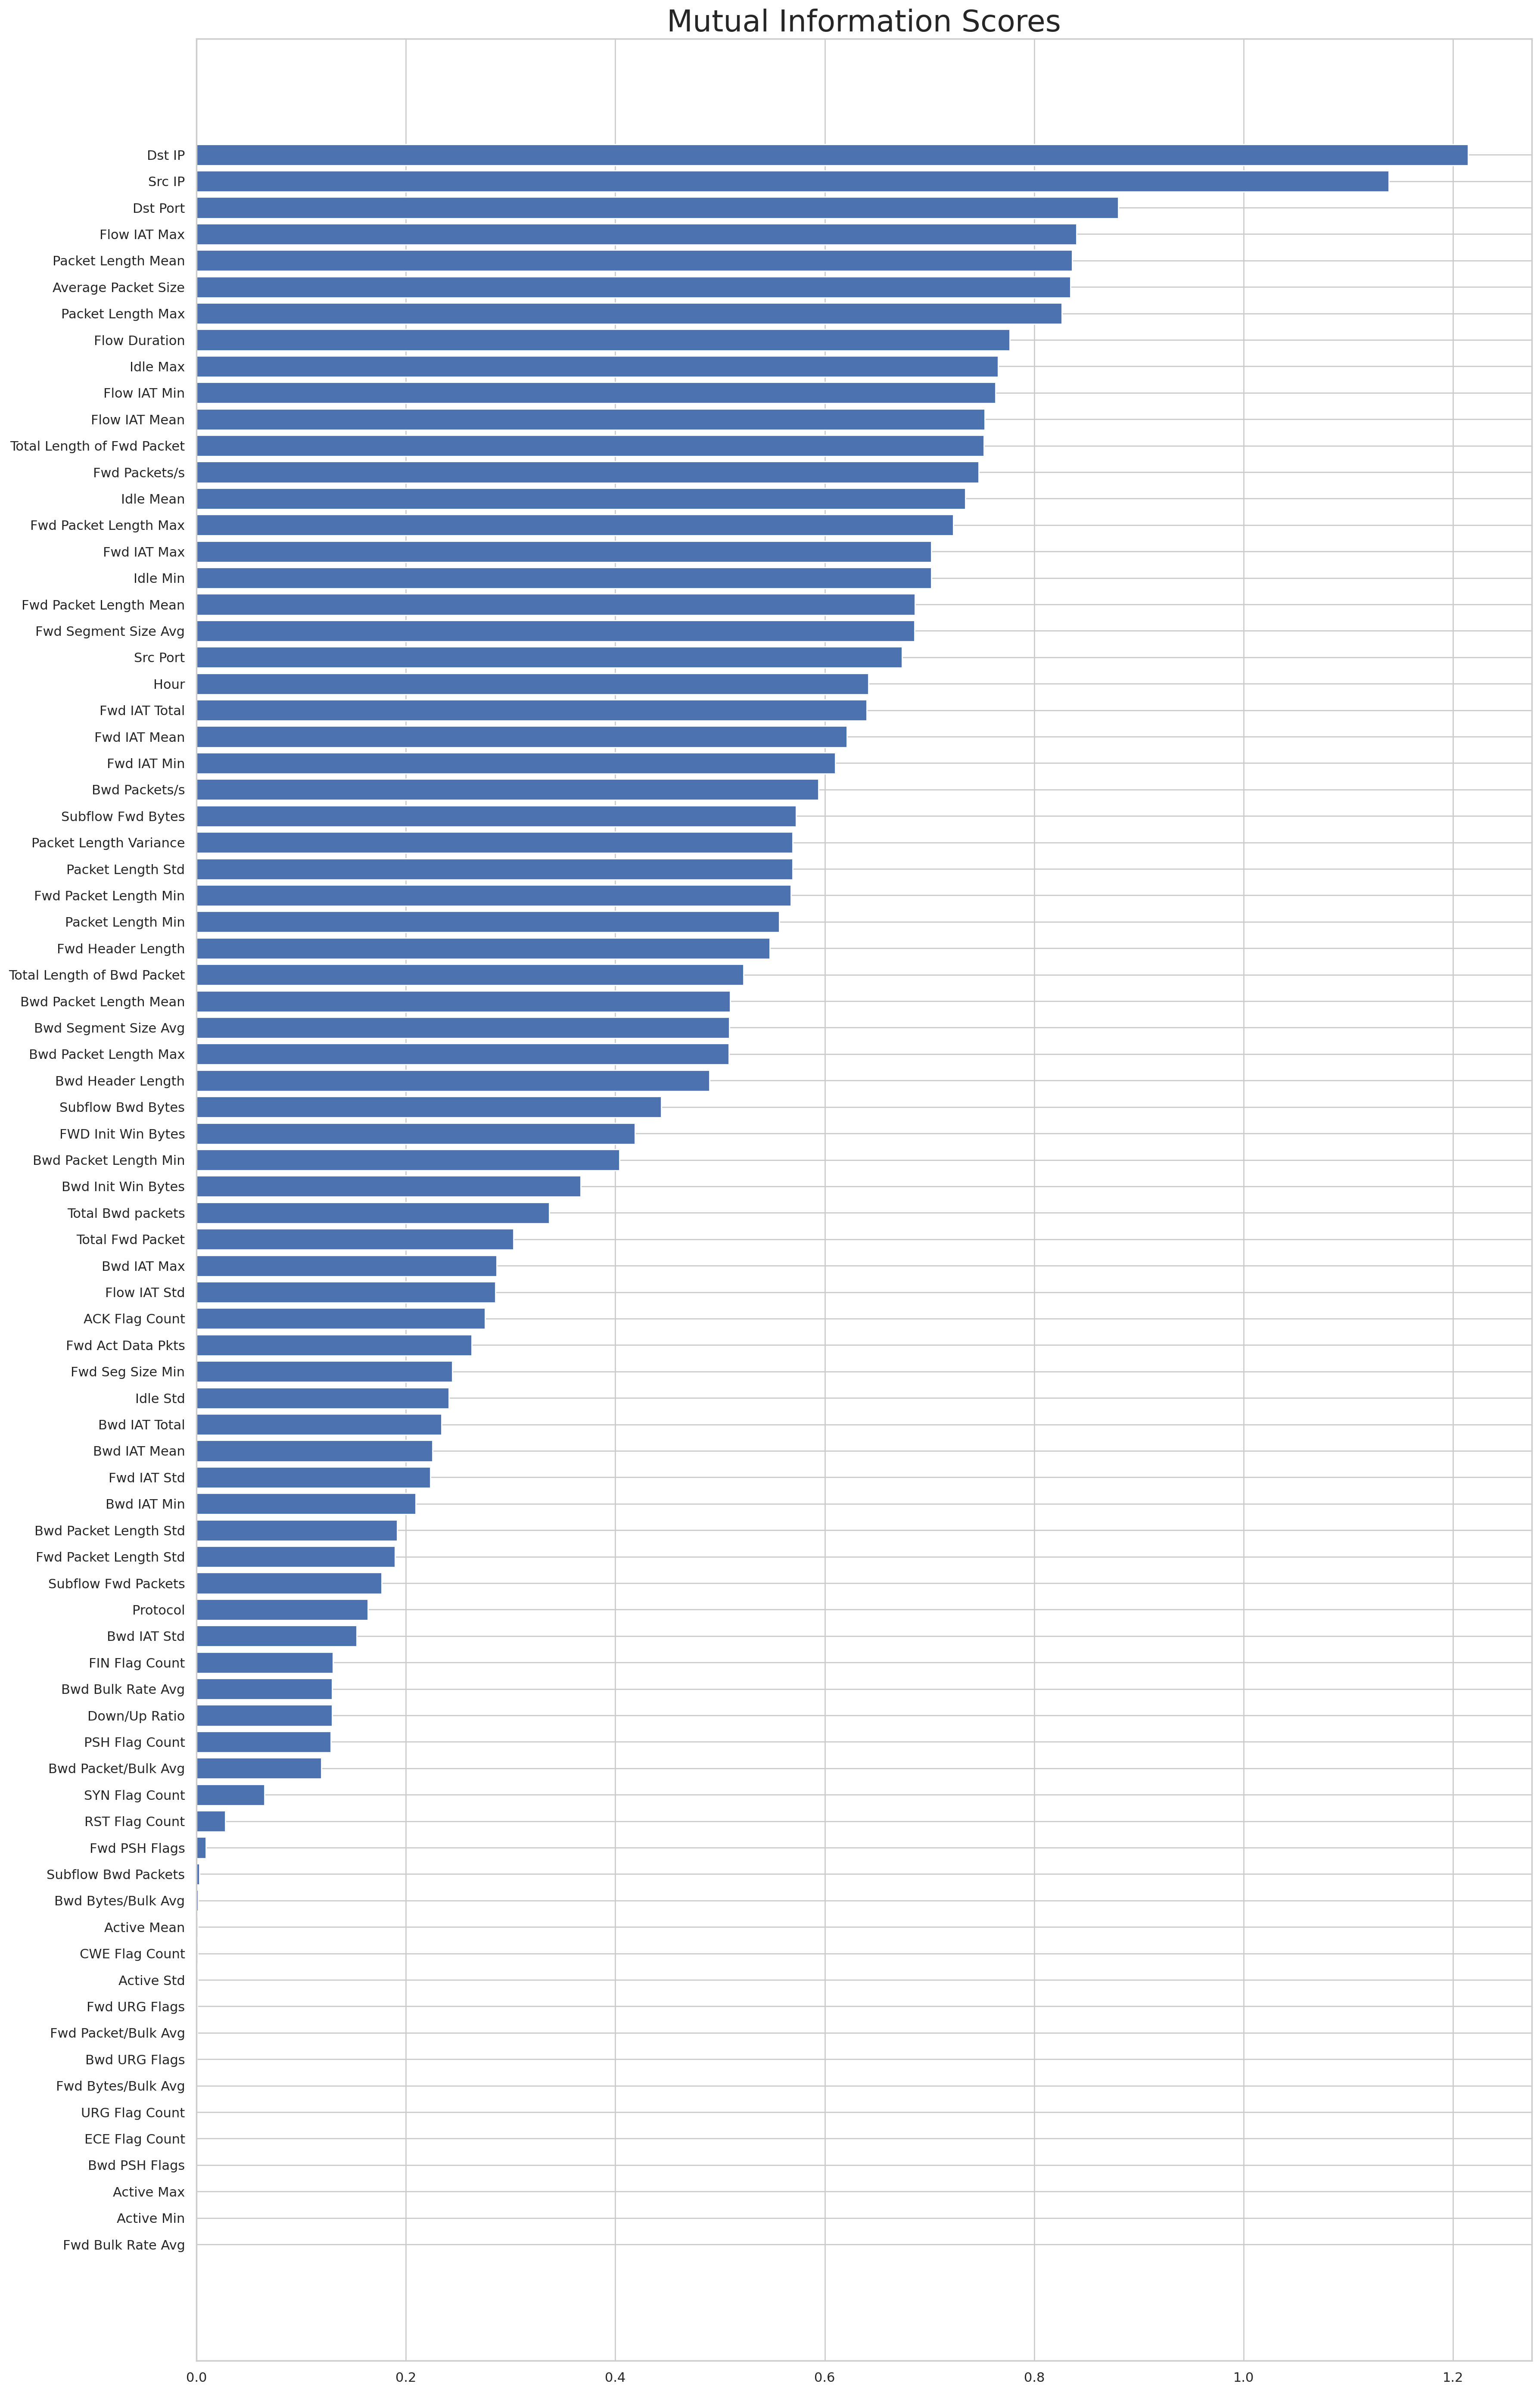

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores", fontsize=25)

plt.figure(dpi=200, figsize=(20, 35))
plot_mi_scores(feat_importances)

In [ ]:
selected_features = feat_importances.nlargest(10).index.tolist()
selected_features

['Dst IP',
 'Src IP',
 'Dst Port',
 'Flow IAT Max',
 'Packet Length Mean',
 'Average Packet Size',
 'Packet Length Max',
 'Flow Duration',
 'Idle Max',
 'Flow IAT Min']

In [ ]:
X_new = X_res[selected_features]
X_new.head()

Dst IP    Src IP  Dst Port  Flow IAT Max  Packet Length Mean  \
0  0.476793  0.003322  0.006760      0.000002            0.000000   
1  0.476793  0.003322  0.006760      0.000003            0.000000   
2  0.476793  0.003322  0.006760      0.000004            0.000000   
3  0.807532  0.003322  0.006760      0.000003            0.000000   
4  0.230823  0.003322  0.294575      0.000651            0.010813   

   Average Packet Size  Packet Length Max  Flow Duration  Idle Max  \
0             0.000000           0.000000       0.000002  0.000000   
1             0.000000           0.000000       0.000003  0.000000   
2             0.000000           0.000000       0.000004  0.000000   
3             0.000000           0.000000       0.000003  0.000000   
4             0.010824           0.007752       0.089820  0.984767   

   Flow IAT Min  
0      0.000021  
1      0.000022  
2      0.000022  
3      0.000022  
4      0.000019

# Model Development and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

X = X_new
y = y_res

# splitting data using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=0)

## Before Tuning

#### 1. K-Nearest Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, digits=5))

Classification Report:
               precision    recall  f1-score   support

           0    0.85146   0.82445   0.83774      9963
           1    0.81544   0.88571   0.84912      9852
           2    0.77953   0.71385   0.74525      9827
           3    0.81042   0.82873   0.81947      9780
           4    0.83568   0.79424   0.81443      9720
           5    0.92658   0.93156   0.92906      9862
           6    0.77774   0.78777   0.78272      9777
           7    0.89505   0.92972   0.91206      9733

    accuracy                        0.83702     78514
   macro avg    0.83649   0.83700   0.83623     78514
weighted avg    0.83653   0.83702   0.83626     78514



In [ ]:
# Perform cross-validation with Accuracy
acc_knn = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
# Perform cross-validation with F1 score
f1_knn = cross_val_score(knn, X, y, cv=5, scoring='f1_weighted')

# Print the cross-validation Accuracy
print("Cross-Validation with Accuracy:", acc_knn)
print("Mean Accuracy:", acc_knn.mean())

# Print the cross-validation F1 scores
print("Cross-Validation with F1 Score:", f1_knn)
print("Mean F1 Score:", f1_knn.mean())

Cross-Validation with Accuracy: [0.77813652 0.87218921 0.83653662 0.8439303  0.80829926]
Mean Accuracy: 0.8278183855193305
Cross-Validation with F1 Score: [0.77186147 0.87131456 0.83588763 0.8432144  0.80612299]
Mean F1 Score: 0.8256802086631371


#### 2. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, digits=5))

Classification Report:
               precision    recall  f1-score   support

           0    0.93251   0.87233   0.90142      9963
           1    0.92745   0.93423   0.93083      9852
           2    0.86087   0.73166   0.79102      9827
           3    0.82642   0.89622   0.85990      9780
           4    0.91712   0.90617   0.91161      9720
           5    0.98412   0.98002   0.98207      9862
           6    0.83720   0.89414   0.86473      9777
           7    0.90139   0.96733   0.93319      9733

    accuracy                        0.89767     78514
   macro avg    0.89838   0.89776   0.89685     78514
weighted avg    0.89854   0.89767   0.89688     78514



In [ ]:
# Perform cross-validation with Accuracy
acc_dt = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
# Perform cross-validation with F1 score
f1_dt = cross_val_score(dt, X, y, cv=5, scoring='f1_weighted')

# Print the cross-validation Accuracy
print("Cross-Validation with Accuracy:", acc_dt)
print("Mean Accuracy:", acc_dt.mean())

# Print the cross-validation F1 scores
print("Cross-Validation with F1 Score:", f1_dt)
print("Mean F1 Score:", f1_dt.mean())

Cross-Validation with Accuracy: [0.83397971 0.92530042 0.90222001 0.89599175 0.85380765]
Mean Accuracy: 0.8822599087534563
Cross-Validation with F1 Score: [0.82858694 0.92483804 0.90122654 0.89526734 0.85006576]
Mean F1 Score: 0.8799969238829499


#### 3. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, digits=5))

Classification Report:
               precision    recall  f1-score   support

           0    0.96498   0.86018   0.90957      9963
           1    0.85077   0.95016   0.89772      9852
           2    0.89107   0.72840   0.80157      9827
           3    0.83085   0.91810   0.87230      9780
           4    0.94049   0.89270   0.91597      9720
           5    0.98896   0.95356   0.97094      9862
           6    0.83805   0.90877   0.87198      9777
           7    0.90567   0.97267   0.93798      9733

    accuracy                        0.89794     78514
   macro avg    0.90136   0.89807   0.89725     78514
weighted avg    0.90151   0.89794   0.89726     78514



In [ ]:
# Perform cross-validation with Accuracy
acc_rf = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
# Perform cross-validation with F1 score
f1_rf = cross_val_score(rf, X, y, cv=5, scoring='f1_weighted')

# Print the cross-validation Accuracy
print("Cross-Validation with Accuracy:", acc_rf)
print("Mean Accuracy:", acc_rf.mean())

# Print the cross-validation F1 scores
print("Cross-Validation with F1 Score:", f1_rf)
print("Mean F1 Score:", f1_rf.mean())

Cross-Validation with Accuracy: [0.83099937 0.94629654 0.90149402 0.90023308 0.86024607]
Mean Accuracy: 0.8878538179820662
Cross-Validation with F1 Score: [0.82474327 0.94613299 0.90078819 0.8995478  0.85722638]
Mean F1 Score: 0.8856877255044833


#### 4. Extreme Gradient Boosting (XGBoost)

In [ ]:
#!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, digits=5))

Classification Report:
               precision    recall  f1-score   support

           0    0.97440   0.84061   0.90258      9963
           1    0.86496   0.93687   0.89948      9852
           2    0.88110   0.67569   0.76484      9827
           3    0.79023   0.91677   0.84881      9780
           4    0.93318   0.89516   0.91378      9720
           5    0.97778   0.96370   0.97069      9862
           6    0.82128   0.91889   0.86735      9777
           7    0.90639   0.96692   0.93567      9733

    accuracy                        0.88915     78514
   macro avg    0.89367   0.88933   0.88790     78514
weighted avg    0.89387   0.88915   0.88791     78514



In [ ]:
# Perform cross-validation with Accuracy
acc_xgb = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')
# Perform cross-validation with F1 score
f1_xgb = cross_val_score(xgb, X, y, cv=5, scoring='f1_weighted')

# Print the cross-validation Accuracy
print("Cross-Validation with Accuracy:", acc_xgb)
print("Mean Accuracy:", acc_xgb.mean())

# Print the cross-validation F1 scores
print("Cross-Validation with F1 Score:", f1_xgb)
print("Mean F1 Score:", f1_xgb.mean())

Cross-Validation with Accuracy: [0.8081883  0.93924689 0.89452065 0.89136831 0.8446563 ]
Mean Accuracy: 0.8755960894303346
Cross-Validation with F1 Score: [0.79755773 0.93913598 0.89341344 0.8903171  0.83988328]
Mean F1 Score: 0.8720615065922679


#### 5. Light Gradient Boosting Machine (LightGBM)

In [ ]:
#!pip install lightgbm
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, digits=5))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 183198, number of used features: 10
[LightGBM] [Info] Start training from score -2.085958
[LightGBM] [Info] Start training from score -2.081091
[LightGBM] [Info] Start training from score -2.079998
[LightGBM] [Info] Start training from score -2.077947
[LightGBM] [Info] Start training from score -2.075334
[LightGBM] [Info] Start training from score -2.081529
[LightGBM] [Info] Start training from score -2.077816
[LightGBM] [Info] Start training from score -2.075900
Classification Report:
               precision    recall  f1-score   support

           0    0.98554   0.83449   0.90374      9963
           1    0.88316   0.95138   0.91600      9852
           

In [ ]:
# Perform cross-validation with Accuracy
acc_lgbm = cross_val_score(lgbm, X, y, cv=5, scoring='accuracy')
# Perform cross-validation with F1 score
f1_lgbm = cross_val_score(lgbm, X, y, cv=5, scoring='f1_weighted')

# Print the cross-validation Accuracy
print("Cross-Validation with Accuracy:", acc_lgbm)
print("Mean Accuracy:", acc_lgbm.mean())

# Print the cross-validation F1 scores
print("Cross-Validation with F1 Score:", f1_lgbm)
print("Mean F1 Score:", f1_lgbm.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2542
[LightGBM] [Info] Number of data points in the train set: 209369, number of used features: 10
[LightGBM] [Info] Start training from score -2.079446
[LightGBM] [Info] Start training from score -2.079446
[LightGBM] [Info] Start training from score -2.079446
[LightGBM] [Info] Start training from score -2.079446
[LightGBM] [Info] Start training from score -2.079408
[LightGBM] [Info] Start training from score -2.079446
[LightGBM] [Info] Start training from score -2.079446
[LightGBM] [Info] Start training from score -2.079446
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006876 seconds.
You can set `f

### Comparing Models

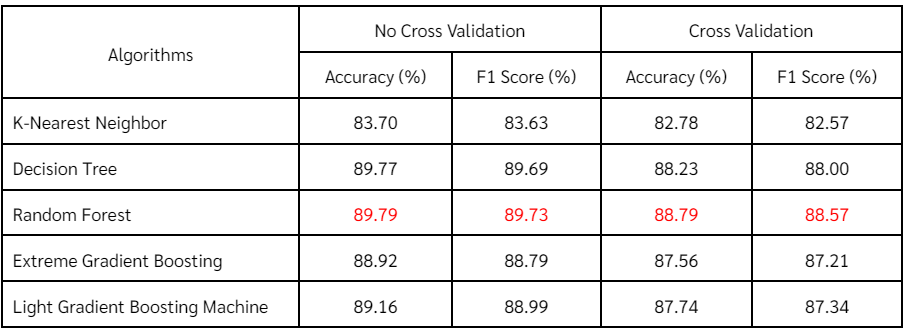

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#### 1. K-Nearest Neighbor Classifier

In [ ]:
# Create a K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier()

# Define a grid of hyperparameters to search through
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create GridSearchCV with the KNN classifier and hyperparameter grid
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (classifier with the best hyperparameters)
best_classifier = grid_search.best_estimator_

# Evaluate the best classifier on the test set
accuracy = best_classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Test Accuracy: 0.8614514608859567


In [ ]:
# Generate predictions on the test set
y_pred = best_classifier.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred, digits=5)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0    0.87890   0.85386   0.86620      9970
           1    0.86609   0.90778   0.88644      9846
           2    0.78044   0.75193   0.76592      9828
           3    0.82720   0.84301   0.83503      9784
           4    0.87634   0.85235   0.86418      9719
           5    0.95189   0.95701   0.95444      9862
           6    0.80545   0.81906   0.81220      9771
           7    0.90352   0.90631   0.90491      9734

    accuracy                        0.86145     78514
   macro avg    0.86123   0.86141   0.86117     78514
weighted avg    0.86129   0.86145   0.86121     78514



In [ ]:
# Generate predictions on the train set
y_train_pred = best_classifier.predict(X_train)

# Print the classification report
report = classification_report(y_train, y_train_pred, digits=5)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0    0.98707   0.99033   0.98870     22744
           1    0.99987   0.99996   0.99991     22868
           2    0.98909   0.99825   0.99365     22886
           3    0.99864   0.99433   0.99648     22930
           4    0.99957   0.99952   0.99954     22995
           5    1.00000   1.00000   1.00000     22852
           6    0.99033   0.98701   0.98867     22943
           7    0.99878   0.99391   0.99634     22980

    accuracy                        0.99541    183198
   macro avg    0.99542   0.99541   0.99541    183198
weighted avg    0.99543   0.99541   0.99542    183198



#### 2. Decision Tree Classifier

In [ ]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state = 0)

# Define a grid of hyperparameters to search through
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create GridSearchCV with the Decision Tree classifier and hyperparameter grid
grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (classifier with the best hyperparameters)
best_classifier = grid_search.best_estimator_

# Evaluate the best classifier on the test set
accuracy = best_classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.8958020225692234


In [ ]:
# Generate predictions on the test set
y_pred = best_classifier.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred, digits=5)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0    0.93332   0.86760   0.89926      9970
           1    0.92606   0.93236   0.92920      9846
           2    0.85623   0.72416   0.78467      9828
           3    0.82086   0.89595   0.85677      9784
           4    0.91096   0.90740   0.90918      9719
           5    0.98286   0.98256   0.98271      9862
           6    0.83583   0.89152   0.86277      9771
           7    0.90559   0.96569   0.93467      9734

    accuracy                        0.89580     78514
   macro avg    0.89646   0.89590   0.89490     78514
weighted avg    0.89663   0.89580   0.89493     78514



In [ ]:
# Generate predictions on the train set
y_train_pred = best_classifier.predict(X_train)

# Print the classification report
report = classification_report(y_train, y_train_pred, digits=5)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0    0.99527   0.92512   0.95892     22744
           1    0.99921   0.99961   0.99941     22868
           2    0.95747   0.81950   0.88313     22886
           3    0.89402   0.96354   0.92748     22930
           4    0.99939   0.99430   0.99684     22995
           5    0.99996   0.99991   0.99993     22852
           6    0.92927   0.99525   0.96113     22943
           7    0.92538   0.98973   0.95647     22980

    accuracy                        0.96093    183198
   macro avg    0.96250   0.96087   0.96041    183198
weighted avg    0.96244   0.96093   0.96042    183198



#### 3. Random Forest Classifier

In [ ]:
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=0)

# Define a grid of hyperparameters to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features' : [None, 'sqrt', 'log2']
}

# Create GridSearchCV with the Random Forest classifier and hyperparameter grid
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (classifier with the best hyperparameters)
best_classifier = grid_search.best_estimator_

# Evaluate the best classifier on the test set
accuracy = best_classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_features': None, 'n_estimators': 300}
Test Accuracy: 0.904590264156711


In [ ]:
# Generate predictions on the test set
y_pred = best_classifier.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred, digits=5)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0    0.95592   0.86570   0.90857      9970
           1    0.93066   0.94191   0.93625      9846
           2    0.86920   0.73769   0.79806      9828
           3    0.83108   0.90617   0.86701      9784
           4    0.92525   0.91573   0.92047      9719
           5    0.98484   0.98793   0.98638      9862
           6    0.83909   0.91526   0.87552      9771
           7    0.91055   0.96733   0.93808      9734

    accuracy                        0.90459     78514
   macro avg    0.90582   0.90472   0.90379     78514
weighted avg    0.90601   0.90459   0.90382     78514



In [ ]:
# Generate predictions on the train set
y_train_pred = best_classifier.predict(X_train)

# Print the classification report
report = classification_report(y_train, y_train_pred, digits=5)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0    0.99495   0.92719   0.95988     22744
           1    0.99926   0.99956   0.99941     22868
           2    0.95279   0.83252   0.88860     22886
           3    0.90230   0.95940   0.92997     22930
           4    0.99948   0.99426   0.99686     22995
           5    0.99991   0.99996   0.99993     22852
           6    0.93089   0.99512   0.96193     22943
           7    0.92827   0.98951   0.95792     22980

    accuracy                        0.96225    183198
   macro avg    0.96348   0.96219   0.96181    183198
weighted avg    0.96343   0.96225   0.96182    183198



#### 4. Extreme Gradient Boosting (XGBoost)

In [ ]:
# Create an XGBoost classifier
xgb = XGBClassifier(random_state=0, objective='multi:softmax', num_class=8)  # 'multi:softmax' for multiclass classification

# Define a grid of hyperparameters to search through
param_grid = {
    'learning_rate': [1, 0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create GridSearchCV with the XGBoost classifier and hyperparameter grid
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (classifier with the best hyperparameters)
best_classifier = grid_search.best_estimator_

# Evaluate the best classifier on the test set
accuracy = best_classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 1, 'n_estimators': 200}
Test Accuracy: 0.8910003311511323


In [ ]:
# Generate predictions on the test set
y_pred = best_classifier.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred, digits=5)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0    0.94526   0.86249   0.90198      9970
           1    0.88891   0.91997   0.90417      9846
           2    0.86424   0.70411   0.77600      9828
           3    0.80684   0.90127   0.85145      9784
           4    0.91885   0.90987   0.91434      9719
           5    0.97187   0.96705   0.96945      9862
           6    0.83784   0.89786   0.86681      9771
           7    0.90610   0.96651   0.93533      9734

    accuracy                        0.89100     78514
   macro avg    0.89249   0.89114   0.88994     78514
weighted avg    0.89265   0.89100   0.88995     78514



In [ ]:
# Generate predictions on the train set
y_train_pred = best_classifier.predict(X_train)

# Print the classification report
report = classification_report(y_train, y_train_pred, digits=5)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0    0.97910   0.90824   0.94234     22744
           1    0.94923   0.97451   0.96170     22868
           2    0.90038   0.75273   0.81996     22886
           3    0.83889   0.91967   0.87742     22930
           4    0.96839   0.95656   0.96244     22995
           5    0.99645   0.99370   0.99507     22852
           6    0.89665   0.94913   0.92215     22943
           7    0.91634   0.97946   0.94685     22980

    accuracy                        0.92930    183198
   macro avg    0.93068   0.92925   0.92849    183198
weighted avg    0.93061   0.92930   0.92848    183198



#### 5. Light Gradient Boosting Machine (LightGBM)

In [ ]:
# Create a LightGBM classifier
lgbm = LGBMClassifier(random_state=0, objective='multiclass', num_class=8)  # 'multiclass' for multiclass classification

# Define a grid of hyperparameters to search through
param_grid = {
    'num_leaves': [30, 50, 70, 90],
    'learning_rate': [1, 0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create GridSearchCV with the LightGBM classifier and hyperparameter grid
grid_search = GridSearchCV(lgbm, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (classifier with the best hyperparameters)
best_classifier = grid_search.best_estimator_

# Evaluate the best classifier on the test set
accuracy = best_classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 183198, number of used features: 10
[LightGBM] [Info] Start training from score -2.086266
[LightGBM] [Info] Start training from score -2.080829
[LightGBM] [Info] Start training from score -2.080042
[LightGBM] [Info] Start training from score -2.078121
[LightGBM] [Info] Start training from score -2.075291
[LightGBM] [Info] Start training from score -2.081529
[LightGBM] [Info] Start training from score -2.077555
[LightGBM] [Info] Start training from score -2.075943
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 90}
Test Accuracy: 0.9017754795323127


In [ ]:
# Generate predictions on the test set
y_pred = best_classifier.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred, digits=5)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0    0.96605   0.86189   0.91100      9970
           1    0.90770   0.95084   0.92877      9846
           2    0.87363   0.71256   0.78491      9828
           3    0.81515   0.90863   0.85935      9784
           4    0.93201   0.91676   0.92432      9719
           5    0.97947   0.97739   0.97843      9862
           6    0.84522   0.91935   0.88073      9771
           7    0.90999   0.96795   0.93807      9734

    accuracy                        0.90178     78514
   macro avg    0.90365   0.90192   0.90070     78514
weighted avg    0.90384   0.90178   0.90072     78514



In [ ]:
# Generate predictions on the train set
y_train_pred = best_classifier.predict(X_train)

# Print the classification report
report = classification_report(y_train, y_train_pred, digits=5)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0    0.98661   0.90380   0.94339     22744
           1    0.95733   0.98605   0.97148     22868
           2    0.91067   0.75640   0.82640     22886
           3    0.84287   0.93040   0.88448     22930
           4    0.97290   0.95869   0.96574     22995
           5    0.99934   0.99851   0.99893     22852
           6    0.89722   0.95729   0.92628     22943
           7    0.91937   0.98090   0.94913     22980

    accuracy                        0.93405    183198
   macro avg    0.93579   0.93400   0.93323    183198
weighted avg    0.93572   0.93405   0.93322    183198



### Comparing Models

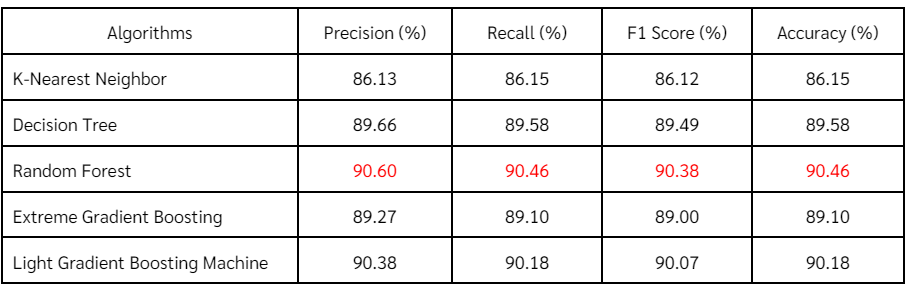